In [1]:
import pandas as pd
import numpy as np

In [27]:
except_values = ['?', '??', 'N/A', 'NA', 'nan', 'NaN', '-nan', '-NaN', 'null', '-']
data = pd.read_csv('../data/track2/merged_stock_trade_volume.csv', na_values = except_values)


c:\Users\bkjeo\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py:3398: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [28]:
data['date'] = pd.to_datetime(data['날짜'])
data = data.drop(['날짜'], axis=1)
data = data.set_index('date')
data.head()

,기관합계,기타법인,개인,외국인합계,전체,code,종가
date,,,,,,,
2017-01-02,7176,289,-1904,-5561,0,11760,21750
2017-01-03,-2253,-12,-3556,5821,0,11760,21400
2017-01-04,6774,0,-11940,5166,0,11760,21600
2017-01-05,3622,0,657,-4279,0,11760,21500
2017-01-06,10540,-290,-8690,-1560,0,11760,21950


In [30]:
grouped_data = data.groupby('code')

In [35]:
grouped_data.get_group(11760)

,기관합계,기타법인,개인,외국인합계,전체,code,종가
date,,,,,,,
2017-01-02,7176,289,-1904,-5561,0,11760,21750
2017-01-03,-2253,-12,-3556,5821,0,11760,21400
2017-01-04,6774,0,-11940,5166,0,11760,21600
2017-01-05,3622,0,657,-4279,0,11760,21500
2017-01-06,10540,-290,-8690,-1560,0,11760,21950
...,...,...,...,...,...,...,...
2022-09-26,-3007,150,-16115,18972,0,11760,16350
2022-09-27,4754,0,-7845,3091,0,11760,16450
2022-09-28,-5321,120,16315,-11114,0,11760,15600


In [37]:
stock_code_list = data['code'].unique()
len(stock_code_list)

1012

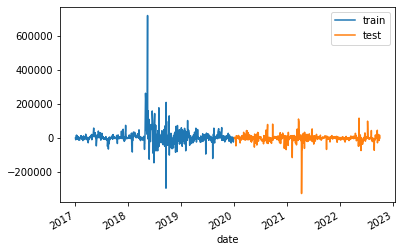

In [39]:
import matplotlib.pyplot as plt
ex_data = grouped_data.get_group(11760)['개인']
train_ex = ex_data.loc[:'2020-01-01']
test_ex = ex_data.loc['2020-01-01':]

ax = train_ex.plot()
test_ex.plot(ax=ax)
plt.legend(['train', 'test'])